In [7]:
import  pandas as pd

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv', 
                            index_col=0 )

In [9]:
dataset_train

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
12/23/2016,790.90,792.74,787.28,789.91,"623,400"
12/27/2016,790.68,797.86,787.66,791.55,"789,100"
12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"


In [10]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv', index_col=0)

In [11]:
dataset_test

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"


In [12]:
training_set = dataset_train[ ['Open']  ]

In [13]:
training_set

,Open
Date,
1/3/2012,325.25
1/4/2012,331.27
1/5/2012,329.83
1/6/2012,328.34
1/9/2012,322.04
...,...
12/23/2016,790.90
12/27/2016,790.68
12/28/2016,793.70


In [14]:
type(training_set)

pandas.core.frame.DataFrame

In [15]:
type(training_set)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

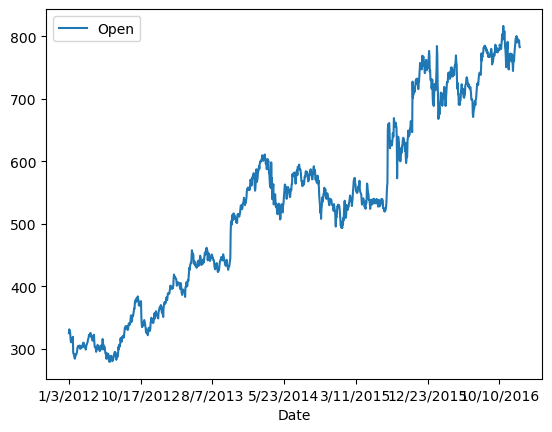

In [16]:
training_set.plot()

In [17]:
real_stock_price = dataset_test[ [ 'Open']  ]

<Axes: xlabel='Date'>

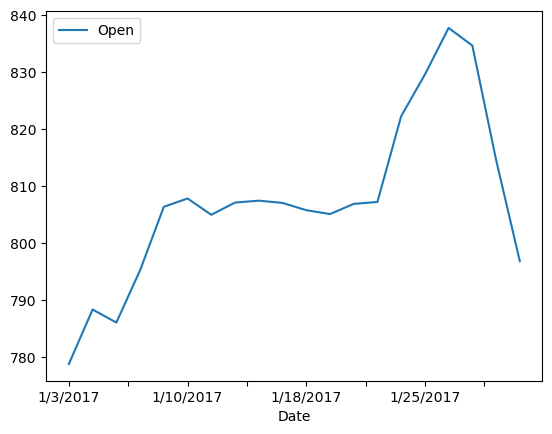

In [18]:
real_stock_price.plot()

In [19]:
type(training_set)

pandas.core.frame.DataFrame

In [20]:
training_set.shape

(1258, 1)

In [21]:
len(training_set)

1258

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc  =  MinMaxScaler(feature_range=(0,1))

In [24]:
training_set_scaled = sc.fit_transform(training_set)

In [25]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [26]:
len(training_set_scaled)

1258

In [27]:
training_set_scaled[0:60, 0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [28]:
training_set_scaled[60, 0]

0.08627874097775134

In [29]:
y_train = training_set_scaled[0, 0]

In [30]:
X_train = []

In [31]:
y_train = []

In [32]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [33]:
type(y_train)

list

In [34]:
import numpy as np

In [35]:
X_train = np.array(X_train)

In [36]:
y_train = np.array(y_train)

In [37]:
type(X_train)

numpy.ndarray

In [38]:
X_train.shape

(1198, 60)

In [39]:
X_train = np.reshape(X_train , (X_train.shape[0]  ,  
                                X_train.shape[1], 1 ))

In [40]:
y_train.shape

(1198,)

In [41]:
from  keras.models import Sequential

In [42]:
from keras.layers import Dense

In [43]:
from keras.layers import LSTM

In [44]:
model = Sequential()

In [45]:
model.add(LSTM(units=60 , return_sequences= True ,
               input_shape = ( X_train.shape[1] ,1)))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.layers

[<LSTM name=lstm, built=True>]

In [47]:
model.add(LSTM(units=60 , return_sequences= True ))

In [48]:
model.add(LSTM(units=60 ))

In [49]:
model.add(Dense(units=1))

In [50]:
model.layers

[<LSTM name=lstm, built=True>,
 <LSTM name=lstm_1, built=True>,
 <LSTM name=lstm_2, built=True>,
 <Dense name=dense, built=True>]

In [51]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [52]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - loss: 0.0799
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0019
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0015
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0016
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0017
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0015
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0012
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0014
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0012
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0012
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0013
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 9.5720e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0011
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0010
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 3.1364e-04
Epoch 79/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 3.5162e-04
Epoch 80/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 5.7458e-04
Epoch 81/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 3.3698e-04
Epoch 82/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 2.8454e-04
Epoch 83/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 5.0341e-04
Epoch 84/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 3.4546e-04
Epoch 85/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 3.7863e-04
Epoch 86/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 3.7824e-04
Epoch 87/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 2.7986e-04
Epoch 88/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 3.2960e-04
Epoch 89/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 3.6062e-04
Epoch 90/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 3.1553e-04
Epoch 91/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 2.4854

In [53]:
model.get_weights

<bound method Layer.get_weights of <Sequential name=sequential, built=True>>